In [2]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mmHg=0.00075

In [4]:
#20 pc de radius
R0=8e-4
A0=np.pi*R0**2

R20=R0*(1+0.01)
A20=np.pi*R20**2

A20/A0-1

0.020100000000000007

array([0.001, 0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256,
       0.512])

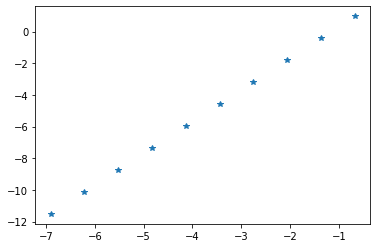

In [5]:
spana=np.array([0.001*2**n for n in range(0,10)])
u=10*spana**2

plt.plot(np.log(spana),np.log(u),'*')
spana

In [6]:
spana=np.array([0.00+0.02*n for n in range(0,10)])
spana

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18])

## Problem description 

We consider a cylindrical vessel of radius $R_v (t)$ and lenght $l$ surrouned by a coaxial cylindrical perivascular space of thickness $h(t)= R_{pvs}(x,t) - R_{v}(t)$ with $ R_{pvs}(x,t)$ the external radius.

The radii $R_{v}(t)$ and $R_{pvs}(t)$ are assumed to be constant along the vessel and dependent on time only. 

We note $A_{pvs} = \pi R_{pvs}^2$ the cross section area of the whole PVS + vessel domains, $A_v = \pi R_{v}^2$ the cross section area of the vessel and $A(t) = A_{pvs}(t)-A_{pvs}(t)$


We assume that $A_{pvs} = A(t)-A_{pvs}(t)$ is known from imaging data.

We are looking to the CSF pressure $P(s,t)$ and flow $Q(s,t)$ in the PVS which both depend on time and position along the vessel $s$.

We set $s=0$ at the middle of the vessel.


In [7]:
# display(Image(filename='./Images/geometry.png', width = 600))

## Equations

The equations describing the CSF flow in the PVS are 

$$ \partial_s Q(s,t) = - \partial_t A(t) + 2 \pi R_{pvs}(t) \kappa (P(s,t)-p_e(s,t)) $$

$$ \partial_t Q(s,t) + \partial_s (\alpha \frac{Q^2}{A})+\frac{A(t)}{\rho}\partial_s P(s,t)=- \frac{12 \nu }{h(t)^2}Q(s,t) $$

with $\kappa$ the hydraulic permeability of the PVS membrane, $\rho$ the density of CSf, $\nu$ the cinematic viscosity of the CSF, $p_e(s,t)$ the external pressure, $\alpha$ the velocity profile parameter  $\alpha= \frac{2 \pi A }{Q^2} \int_{R_{v}}^{R_{pvs}} r u_s ^2 d r $ with $u_s (r)$ the CSF velocity in the axial direction.

If we consider slit shaped pores to describe the slots between astrocyte endfeet,the associated permeability is :

$$\kappa= \frac{\epsilon_s  h^2}{3 \rho \nu \delta_m}$$

with $\epsilon_s$ the area of slots over the total area, $h$ the hald width of the slots and $\delta_m$ the thickness of the membrane.

Let $P_{in}$ and $P_{out}$ be the pressures at the entrance and the exit of the tube respectively.


## Tube length

In [8]:
l=200e-4 #cm

## Imposed wall deformation

Let the radii be sinusoidal functions with a period $T$. We chose the expressions

$$R_v=R_{v,0}(1+a_v sin(\omega t ))$$

$$R_{pvs}=R_{pvs,0}(1+a_{pvs} sin(\omega t + 2\pi\phi))$$

with $\omega = 2 \pi /T$, $R_{v,0}$ and $R_{pvs,0}$ being the mean radii, $a_v$, $a_{pvs}$ the amplitude ratios of the deformations for the vessel and PVS outer boundary respectively and $\phi$ the phase shift of PVS deformation compared to the vessel deformation, as a ratio of the cycle period.


In [9]:
T=1/0.2 #period of the wall dilations
w=2*np.pi/T

In [10]:
Rv0= 8e-4 #cm
Rpvs0=10e-4 #cm

av=0.1
apvs=0.0

phi=0.0

Rv=lambda t : Rv0*(1+av*np.sin(w*t))
dRvdt=lambda t : w*Rv0*av*np.cos(w*t)
dRvdt2=lambda t : -w**2*Rv0*av*np.sin(w*t)

Rpvs=lambda t : Rpvs0*(1+apvs*np.sin(w*t+phi*2*np.pi))
dRpvsdt=lambda t : w*Rpvs0*apvs*np.cos(w*t+phi*2*np.pi)
dRpvsdt2=lambda t : -w**2*Rpvs0*apvs*np.sin(w*t+phi*2*np.pi)

A=lambda t : np.pi*Rpvs(t)**2-np.pi*Rv(t)**2
dAdt=lambda t : 2*np.pi*(Rpvs(t)*dRpvsdt(t)-Rv(t)*dRvdt(t))
dAdt2=lambda t : 2*np.pi*(Rpvs(t)*dRpvsdt2(t)+dRpvsdt(t)**2-Rv(t)*dRvdt2(t)-dRvdt(t)**2)


Text(0, 0.5, 'CSF cross section area (cm^2)')

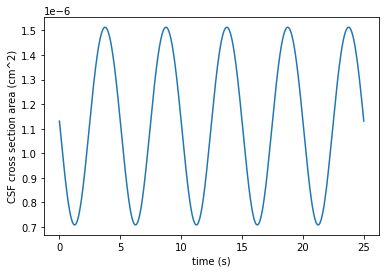

In [11]:
spanTimes=np.arange(0,5*T,0.001)

plt.plot(spanTimes,A(spanTimes))
plt.xlabel('time (s)')
plt.ylabel('CSF cross section area (cm^2)')

Text(0, 0.5, 'Radii (cm)')

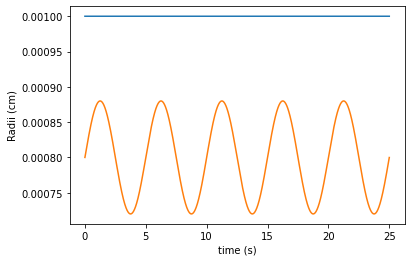

In [12]:
plt.plot(spanTimes,Rpvs(spanTimes))
plt.plot(spanTimes,Rv(spanTimes))

plt.xlabel('time (s)')
plt.ylabel('Radii (cm)')

## Case no 1 : No permeability, neglectable non linear term, symetrical problem

We assume $\kappa = 0$, $\partial_s (\alpha \frac{Q^2}{A})<<1$ and $P_{in}=P_{out}=p_e$ which could be a function of time.

The equations become

$$ \partial_s Q(s,t) = - \partial_t A(t) $$

$$ \partial_t Q(s,t) +\frac{A(t)}{\rho}\partial_s P(s,t)=- \frac{12 \nu }{h(t)^2}Q(s,t) $$

### Flow profile

The problem is symetrical arround $s=0$ and we must have $Q(-s)=Q(s)$. Therefor Q(0)=0.

From the first equation we have 

$$Q(s,t)= - \partial_t A(t) s$$

The flow is a linear function of s with a slope depending on the wall velocities.

The flow value at the exit of the tube is 

$$Q(l/2,t)= - \partial_t A(t) \frac{l}{2} $$

In [13]:
Q=lambda s , t : -dAdt(t)*s

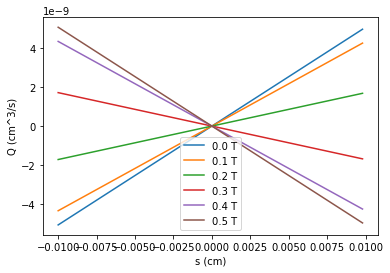

In [14]:
spanS=np.arange(-l/2,l/2,l/100)


for t in np.arange(0,0.6,0.1)*T :
    plt.plot(spanS,Q(spanS,t),label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('Q (cm^3/s)')

plt.legend()

### Velocity profile

Velocity at the entrance of the tube

Text(0.5, 0, 'time (s)')

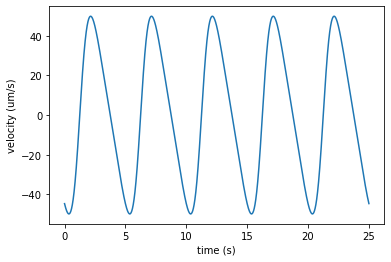

In [15]:
U=lambda s , t : Q(s,t)/A(t)

plt.plot(spanTimes,U(-l/2,spanTimes)*1e4)
plt.ylabel('velocity (um/s)')
plt.xlabel('time (s)')

### Pressure profile

By injecting flow expression in the momentum equation we have

$$ \partial_s P(s,t)=\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] s $$

with $R(t)= \frac{12 \nu \rho}{h(t)^2 A(t)}$ and $L(t)= \frac{ \rho}{A(t)}$.

Wich leads to the following parabolic shape of the pressure 


$$P(s,t)=\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] \frac{s^2}{2} + c(t)$$

as $P_{in}=P_{out}=p_e$ we get


$$P(s,t)=p_e+\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] (\frac{s^2}{2}-\frac{l^2}{8})$$

The maximum/minimum in the pressure spatial shape is in the middle of the tube 


$$P(0,t)=p_e+\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] (-\frac{l^2}{8})$$

In [16]:
nu = 0.7e-2 # stokes (cm2/s), cinematic viscosity of water 35 deg C
rho = 1 # g /cm3, density of water

h=lambda t : Rpvs(t)-Rv(t)
R= lambda t : 12*nu*rho/(h(t)**2*A(t))
L=lambda t : rho/A(t)

In [17]:
pe=0/mmHg #dyn/cm2


P=lambda s , t : pe + (R(t)*dAdt(t) + L(t)*dAdt2(t))*(s**2/2-l**2/8)


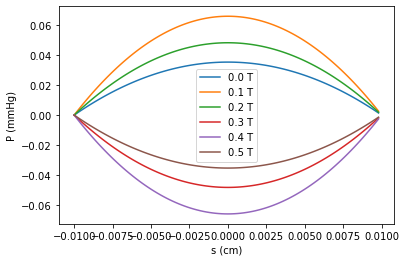

In [18]:
for t in np.arange(0,0.6,0.1)*T :
    plt.plot(spanS,P(spanS,t)*mmHg,label='%.1f T'%(t/T))
    
plt.xlabel('s (cm)')
plt.ylabel('P (mmHg)')

plt.legend()

Text(0.5, 0, 'time (s)')

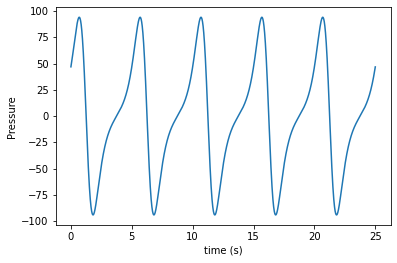

In [19]:
Pmiddle=[P(0,t) for t in spanTimes ]

plt.plot(spanTimes,Pmiddle)
plt.ylabel('Pressure')
plt.xlabel('time (s)')

## Case no 2 : No permeability, neglectable non linear term, no flow at one end, constant pe

We assume that the flow in zero at the end of the tube $Q_{out}=0$

The reference s=0 is at the entrance of the vessel

We considere a sinus form of the PVS area

In [79]:
def A(t, a, f, phi=0, Rv0=8e-4, h0=2e-4) :
    w=2*np.pi*f
    Av0=np.pi*Rv0**2
    Aast0=np.pi*(Rv0+h)**2
    A0=Aast0-Av0
    return A0*(1+a*np.sin(w*t+phi*2*np.pi))

In [80]:
def dAdt(t, a, f, phi=0, Rv0=8e-4, h0=2e-4) :
    w=2*np.pi*f
    Av0=np.pi*Rv0**2
    Aast0=np.pi*(Rv0+h)**2
    A0=Aast0-Av0
    return A0*(w*a*np.cos(w*t+phi*2*np.pi))

In [81]:
def dAdt2(t, a, f, phi=0, Rv0=8e-4, h0=2e-4) :
    w=2*np.pi*f
    Av0=np.pi*Rv0**2
    Aast0=np.pi*(Rv0+h)**2
    A0=Aast0-Av0
    return -A0*(w**2*a*np.sin(w*t+phi*2*np.pi))

In [82]:
Rv0=8e-4
h=2e-4
Aast=np.pi*(Rv0+h)**2

Text(0, 0.5, 'radius (um)')

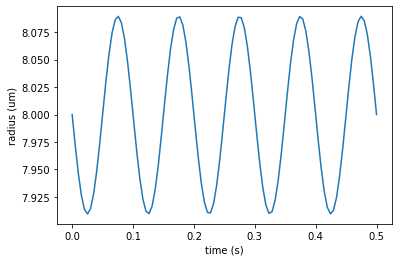

In [83]:
spantemps=np.linspace(0,0.5,100)
plt.plot(spantemps,np.sqrt((Aast-A(spantemps,0.04,10))/np.pi)*1e4)
plt.xlabel('time (s)')
plt.ylabel('radius (um)')

In [25]:
Av=(Aast-A(spantemps,0.04,10))

(max(Av)-min(Av))/Av[0]


0.04499433574532453

### Flow profile 

From the mass conservation equation we obtain 

$$Q(s,t)= - \partial_t A(t) (s-l)$$

In [84]:
def Q (s, t, a, f, l, phi=0, Rv0=8e-4) :
    return -dAdt(t, a, f, phi, Rv0)*(s-l)

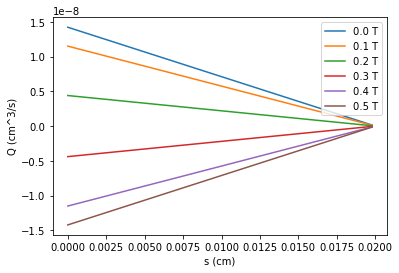

In [85]:
l=200e-4
a=0.01
f=10


spanS=np.arange(0,l,l/100)


for t in np.arange(0,0.6,0.1)/f :
    plt.plot(spanS,Q(spanS,t,a,f,l),label='%.1f T'%(t*f))
    
plt.xlabel('s (cm)')
plt.ylabel('Q (cm^3/s)')

plt.legend()

### Velocity profile

Velocity profile at the entrance of the tube

In [86]:
def U (s, t, a, f, l, phi=0, Rv0=8e-4) :
    return Q(s, t, a, f, l, phi, Rv0)/A ( t, a, f, phi, Rv0)



Text(0.5, 0, 'time (s)')

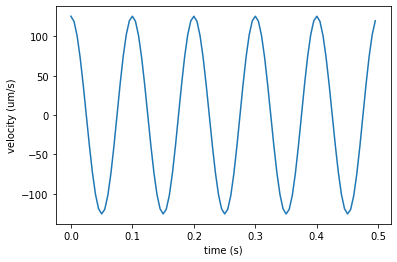

In [87]:
spanTimes=np.arange(0,1/f*5,1/f*5/100)

plt.plot(spanTimes,U(0, spanTimes, a, f, l)*1e4)
plt.ylabel('velocity (um/s)')
plt.xlabel('time (s)')

The momentum equation is 

$$\partial_s P(s,t)=[R(t )\partial_t A(t)+ L(t)\partial_t^2 A(t)](s-l)$$



$$P(s,t)=\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] \frac{s^2}{2} -\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] ls + c(t)$$

as $P_{in}=P(0)=p_e$ we get


$$P(s,t)=p_e+\left[ R(t) \partial_t A(t) + L(t) \partial_t^2 A(t) \right ] \left( \frac{s^2}{2}- ls\right)$$

In [31]:
nu = 0.7e-2 # stokes (cm2/s), cinematic viscosity of water 35 deg C
rho = 1 # g /cm3, density of water
pe=0/mmHg #dyn/cm2


h=lambda t : Rpvs(t)-Rv(t)
R= lambda t : 12*nu*rho/(h(t)**2*A(t))
L=lambda t : rho/A(t)

In [40]:
def P(s, t, a, f, l, phi=0, Rv0=8e-4, h0=2e-4) :
    Rpvs=Rv0+h0
    h_t=np.sqrt(A(t, a, f, phi, Rv0,h0)/np.pi) ## Sould put the rectangular area approx for constitency
    R=12*nu*rho/(h_t**2*A(t, a, f, phi, Rv0, h0))
    L=rho/A(t, a, f, phi, Rv0,h0)
    
    return pe + (R*dAdt(t, a, f, phi, Rv0,h0)+ L*dAdt2(t, a, f, phi, Rv0,h0))*(s**2/2-l*s)


In [41]:
for t in np.arange(0,0.6,0.1)/f :
    plt.plot(spanS,P(spanS,t,a,f,l)*mmHg,label='%.1f T'%(t*f))
    
plt.xlabel('s (cm)')
plt.ylabel('P (mmHg)')

plt.legend()

TypeError: unsupported operand type(s) for +: 'float' and 'function'

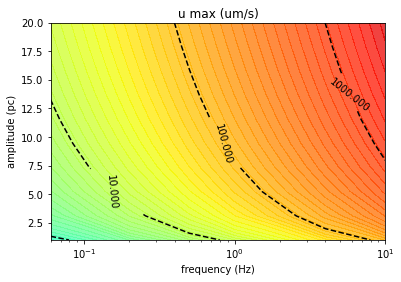

In [101]:
# map of u max
l=200e-4

from matplotlib.colors import LogNorm
spanf = np.logspace(-2, 1, 10)
spanf=np.array([60,200,500,1000,4000,10000])/1000
spana = np.linspace(0.01, 0.2, 10)

X, Y = np.meshgrid(spanf, spana)

h=2e-4
D=2e-8
Z=U(0, 0, Y, X, l)*1e4 # Umax
#Z=h*U(0, 0, Y, X, l)/D # Peclet

plt.contourf(X, Y*100, Z, np.logspace(-3, 4, 100), alpha=.75, cmap=plt.cm.jet,norm = LogNorm())
C = plt.contour(X, Y*100, Z, [1e-1,1,10,100, 1000],linestyles='dashed', colors='black')
plt.clabel(C, inline=1, fontsize=10)


plt.xscale('log')
plt.title('u max (um/s)')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude (pc)')

plt.savefig('/home/alexandra/Documents/Articles/Sleep/Images/U_map_analytic.svg')
plt.savefig('/home/alexandra/Documents/Articles/Sleep/Images/U_map_analytic.png')

In [76]:
format_joblaunch='python3 ../fbb_DD/PVS_simulation.py -j A%ipc-%imHz-D0 --resistance -1 -xi 100e-4 -ai %e -fi %e -tend %e -toutput %e --time_step %e --diffusion_coef 2e-8 --l 200e-4 -nl 400 -nr 8 --sigma 1e-4 &\n'



format_joblabel='A%ipc-%imHz-D0'
h=2e-4
D=2e-8
for f in spanf :
    for a in spana : 
        tend=max(3/f,4*h**2/D)
        dt=min(1/f/8,tend/1000)
        f=float('%.0e'%f)
        a=round(a*100)/100
        toutput=1/f/4
        Noutput=tend/toutput
        print(format_joblaunch%(round(a*100), round(f*1000), a, f, tend, toutput, dt))
        #print(format_joblabel%(round(a*100), round(f*1000)))
        if Noutput>500 :
            print('f',f)
            print('tend',tend)
            print('dt',dt)
            print(Noutput)
            print('aie !')
        if int(toutput/dt)== 0 :
            print('dt',tend)
            print('toutput',toutput)
            print('aie !')
        if dt>toutput:
            print('dt',tend)
            print('toutput',toutput)
            print('aie !')
        if dt>=tend:
            print('dt',tend)
            print('toutput',toutput)
            print('aie !')
        if toutput>=tend:
            print('tend',tend)
            print('toutput',toutput)
            print('aie !')            
            
    print('wait\n')

            
        


python3 ../fbb_DD/PVS_simulation.py -j A1pc-1mHz-D0 --resistance -1 -xi 100e-4 -ai 1.000000e-02 -fi 1.000000e-03 -tend 3.000000e+03 -toutput 2.500000e+02 --time_step 3.000000e+00 --diffusion_coef 2e-8 --l 200e-4 -nl 400 -nr 8 --sigma 1e-4 &

python3 ../fbb_DD/PVS_simulation.py -j A3pc-1mHz-D0 --resistance -1 -xi 100e-4 -ai 3.000000e-02 -fi 1.000000e-03 -tend 3.000000e+03 -toutput 2.500000e+02 --time_step 3.000000e+00 --diffusion_coef 2e-8 --l 200e-4 -nl 400 -nr 8 --sigma 1e-4 &

python3 ../fbb_DD/PVS_simulation.py -j A5pc-1mHz-D0 --resistance -1 -xi 100e-4 -ai 5.000000e-02 -fi 1.000000e-03 -tend 3.000000e+03 -toutput 2.500000e+02 --time_step 3.000000e+00 --diffusion_coef 2e-8 --l 200e-4 -nl 400 -nr 8 --sigma 1e-4 &

python3 ../fbb_DD/PVS_simulation.py -j A7pc-1mHz-D0 --resistance -1 -xi 100e-4 -ai 7.000000e-02 -fi 1.000000e-03 -tend 3.000000e+03 -toutput 2.500000e+02 --time_step 3.000000e+00 --diffusion_coef 2e-8 --l 200e-4 -nl 400 -nr 8 --sigma 1e-4 &

python3 ../fbb_DD/PVS_simulation

/home/alexandra/anaconda3/envs/Pulse/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Log scale: values of z <= 0 have been masked
  if __name__ == '__main__':


Text(0, 0.5, 'frequency (Hz)')

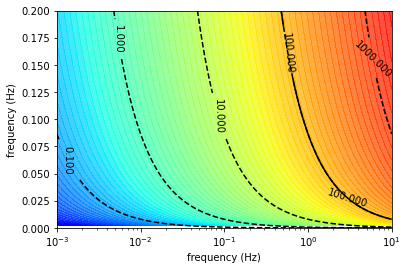

In [256]:
# map of u max
from matplotlib.colors import LogNorm
spanf = np.logspace(-3, 1, 100)
spana = np.linspace(0, 0.2, 100)

X, Y = np.meshgrid(spanf, spana)
Z=U(0, 0, Y, X, l)*1e4
Z=Y*2*np.pi*X*1e4/(1+Y)*l
plt.contourf(X, Y, Z , np.logspace(-3, 4, 100), alpha=.75, cmap=plt.cm.jet,norm = LogNorm())
C = plt.contour(X, Y, Z, [1e-1,1,10,100, 1000],linestyles='dashed', colors='black')
plt.clabel(C, inline=1, fontsize=10)
C = plt.contour(X, Y, Z, [100], colors='black')
plt.clabel(C, inline=1, fontsize=10)

plt.xscale('log')

plt.xlabel('frequency (Hz)')
plt.ylabel('frequency (Hz)')

In [245]:
l=200e-4

In [250]:
2e-4**2/2e-8*10

20.0

Text(0, 0.5, 'frequency (Hz)')

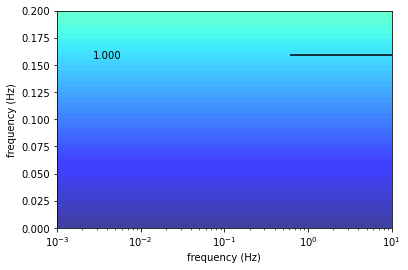

In [246]:
# map of u max
from matplotlib.colors import LogNorm
spanf = np.logspace(-3, 1, 100)
spana = np.linspace(0, 0.2, 100)

X, Y = np.meshgrid(spanf, spana)

plt.contourf(X, Y, U(0, 0, Y, X, l)/X/l,np.linspace(0,3,100), alpha=.75, cmap=plt.cm.jet)
C = plt.contour(X, Y, U(0, 0, Y, X, l)/X/l, [1], colors='black')
plt.clabel(C, fontsize=10)

plt.xscale('log')

plt.xlabel('frequency (Hz)')
plt.ylabel('frequency (Hz)')

### Dispertion enhancement factor versus frequency

We peformed simulation of this case with 10 pc of deformation with Fenics and computed the disperstion enhancement factor.

Text(0, 0.5, 'R')

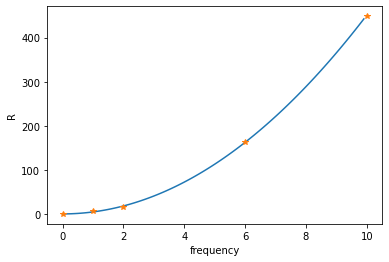

In [88]:
f=[0,1,2,6,10]
D=[2.266399412754423e-11, 1.8005288379419793e-10, 4.025450268970163e-10, 3.703075822272239e-09, 1.0155453230730128e-08]

x=np.arange(0,10,0.1)
plt.plot(x,4.5*x**2+1)
plt.plot(f,np.array(D)/D[0],'*')
plt.xlabel('frequency')
plt.ylabel('R')


## Case no 3 : neglectable non linear term, no outflow with wall permeability

$$ \partial_s Q(s,t) = - \partial_t A(t) -K(t) (P(s,t)-p_e) $$
$$\partial_s P(s,t)=- R(t)Q(s,t) - L(t)\partial_t Q(s,t)$$

with $K(t)=2 \pi R_{pvs}(t) \kappa$ , $R(t)= \frac{12 \nu \rho}{h(t)^2 A(t)}$ and $L(t)= \frac{ \rho}{A(t)}$.

We derivate the first equation and insert it into the second equation and obtain a reaction-diffusion equation

$$\partial_t Q =M(t) \partial_s^2 Q+ N(t)  Q  $$

with 

$$ M(t)= \frac{1}{K(t)L(t)} $$

and 

$$ N (t) = - \frac{R(t)}{L(t)} $$ 

And the boundary condition are

$$Q(\frac{l}{2},t) =0 $$

$$ \partial_s Q(- \frac{l}{2},t) = - \partial_t A(t) -K(t) (P(- \frac{l}{2},t)-p_e) =  - \partial_t A(t)$$

We note that Q do not depends on the external pressure $p_e$.


In [89]:
poroast= 0.01 # ratio of slots area / total area in PVS membrane 1 % ????
hast=20e-7 # half of the width between astrocyte end feet 20nm in mice ?
e=1e-4

kappa=poroast*hast**2/(3*rho*nu*e)

K=lambda t : 2*np.pi*Rpvs(t)*kappa

M = lambda t : 1/K(t)/L(t)

N= lambda t : -R(t)/L(t)

f= lambda t : -R(t)/L(t)

In [90]:
def solver_FE_simple(M, N , L, dt, T,F0):
    """
    Simplest expression of the computational algorithm
    using the Forward Euler method and explicit Python loops.
    For this method F <= 0.5 for stability.
    
    T : final time
    dt : time step
    L : length of the vessel
    M 
    N
    
    
    """
    import time;  t0 = time.time()  # For measuring the CPU time

    Nt = int(round(T/float(dt)))
    t = np.linspace(0, Nt*dt, Nt+1)   # Mesh points in time
    dx = min(np.sqrt(min(M(t))*dt/F0),L/100)
    
    print(np.sqrt(min(M(t))*dt/F0))
    
    Nx = int(round(L/dx))
    x = np.linspace(0, L, Nx+1)       # Mesh points in space
    
    # Make sure dx and dt are compatible with x and t
    dx = x[1] - x[0]
    dt = t[1] - t[0]

    F=dt/dx**2
    
    u   = np.zeros(Nx+1)
    u_n = np.zeros(Nx+1)

    # Set initial condition u(x,0) = 0
    for i in range(0, Nx+1):
        u_n[i] = 0

    for n in range(0, Nt):
        # Compute u at inner mesh points
        for i in range(1, Nx):
            u[i] = u_n[i] + M(t[n])*F*(u_n[i-1] - 2*u_n[i] + u_n[i+1]) + \
                   dt*N(t[n])*u_n[i]

        # Insert boundary conditions
        u[0] = -A(t[n])*dx+u[1];  u[Nx] = 0
        

        # Switch variables before next step
        #u_n[:] = u  # safe, but slow
        u_n, u = u, u_n

    t1 = time.time()
    return u_n, x, t, t1-t0  # u_n holds latest u

In [91]:
u_n, x, t, CPUtime=solver_FE_simple(M, N , L=400, dt=1e-2, T=1, F0=0.2)

17.467817089895323


/home/alexandra/anaconda3/envs/Pulse/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in double_scalars
/home/alexandra/anaconda3/envs/Pulse/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/home/alexandra/anaconda3/envs/Pulse/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars


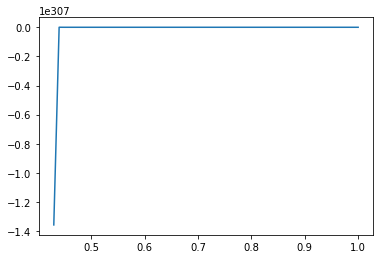

In [92]:
plt.plot(t,u_n)

Text(0.5, 0, 'time (s)')

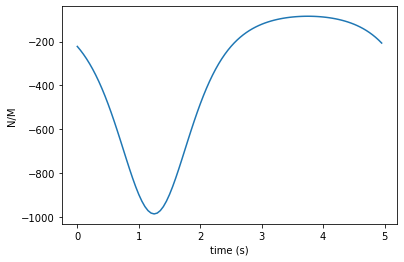

In [93]:
spantemps=np.arange(0,T,0.01*T)

plt.plot(spantemps,N(spantemps)/M(spantemps))

plt.ylabel('N/M')
plt.xlabel('time (s)')

In [94]:
from scipy import integrate

def Tau (spanTemps) :
    spanM=M(spanTemps)
    return integrate.cumtrapz(spanM, spanTemps, initial=0)

def V (spanTemps) :
    spanT=Tau(spanTemps)
    spanF=N(spanTemps)/M(spanTemps)
    return integrate.cumtrapz(spanF, spanT, initial=0)


In [95]:
plt.plot(spanTemps,V(spanTemps))

plt.ylabel('T')
plt.xlabel('time (s)')

NameError: name 'spanTemps' is not defined

In [ ]:
plt.plot(T(spanTemps),N(spanTemps)/M(spanTemps))

plt.ylabel('N/M')
plt.xlabel('T')

In [ ]:
for t in spanTimes[1::] :
    plt.plot(t,V(t),'+')

## Case no 2 : No permeability, neglectable non linear term, output resistances, constant SAS pressure

We condider that the CSF pressure in the SAS is $p_e$. For now we assume this pressure is constant.

We consider an hydraulic resistance $R_{in}$ between the SAS and the tube entrance, and a resistance $R_{out}$ between the tube end and the SAS.

We therefor have 

$$ Q_{in}=\frac{p_e-p_{in}(t)}{R_{in} }$$

$$ Q_{out}=\frac{p_{out}(t)-p_e}{R_{out} }$$


The pressures $p_{in}$ and $p_{out}$ are now part of the unknowns.

The equations are still 

$$ \partial_s Q(s,t) = - \partial_t A(t) $$

$$ \partial_t Q(s,t) +\frac{A(t)}{\rho}\partial_s P(s,t)=- \frac{12 \nu }{h(t)^2}Q(s,t) $$

From the mass conservation equation we obtain 

$$Q(s,t)= - \partial_t A(t) (s+\frac{l}{2}) + \frac{p_e-p_{in}(t)}{R_{in}}$$

with

$$ \frac{p_{in}(t)}{R_{in}}+\frac{p_{out}(t)}{R_{out}}=\partial_t A(t) l + \frac{p_e}{R_{in}}+\frac{p_e}{R_{out}} $$

The momentum equation  is 

$$\partial_s P(s,t)=- R(t)Q(s,t) - L(t)\partial_t Q(s,t)$$

Using the flow expression we obtain

$$ \partial_s P(s,t)=[R(t)\partial_t A+L(t)\partial_t^2A](s+\frac{l}{2})+L(t) \frac{\partial_t p_{in}}{R_{in}}+R(t)\frac{p_{in}(t)-p_e}{R_{in}} $$

$$  P(s,t)=\left[R(t)\partial_tA+L(t)\partial_t^2A\right]\frac{s^2}{2}+\left[R(t)(\partial_t A \frac{l}{2}+\frac{p_{in}(t)-p_e}{R_{in}})+L(t)(\partial_t^2A\frac{l}{2}+ \frac{\partial_t p_{in}}{R_{in}})\right]s + c(t)$$

we set the constant $c(t)$ expression in order to have $P(-\frac{l}{2},t)=p_{in}(t)$. Then,

$$  P(s,t)=p_{in}(t)+\left[R(t)\partial_tA+L(t)\partial_t^2A\right](\frac{s^2}{2}-\frac{l^2}{8})+\left[R(t)(\partial_t A \frac{l}{2}+\frac{p_{in}(t)-p_e}{R_{in}})+L(t)(\partial_t^2A\frac{l}{2}+ \frac{\partial_t p_{in}}{R_{in}})\right](s+\frac{l}{2})$$

Also we have  $P(\frac{l}{2},t)=p_{out}(t)$ which provide the equation 

$$  p_{out}(t)=p_{in}(t)+\left[R(t)(\partial_t A(t) \frac{l}{2}+\frac{p_{in}(t)-p_e}{R_{in}})+L(t)(\partial_t^2A(t)\frac{l}{2}+ \frac{\partial_t p_{in}(t)}{R_{in}})\right]l$$

by using the fact that 

$$ \frac{p_{out}(t)}{R_{out}}=-\frac{p_{in}(t)}{R_{in}}+\partial_t A(t) l + \frac{p_e}{R_{in}}+\frac{p_e}{R_{out}} $$

We obtain an equation for $p_{in}(t)$

$$ \partial_t p_{in}(t) + k(t) p_{in}(t) = g(t) $$

with 

$$k(t)= \frac{R_{out}+R_{in}+R(t)l}{L(t)l}$$

and

$$g(t)= \frac{R_{in}}{L(t)l} \left[ \partial_t A(t) l R_{out} + p_e(\frac{R_{out}}{R_{in}}+1) -R(t) ( \partial_t A \frac{l^2}{2}-\frac{p_e}{R_in}l)  -L(t)\frac{l^2}{2}\partial_t^2A(t) \right]$$


In [ ]:
Rout=15000
Rin=15000

k = lambda t : (Rout + Rin + R(t)*l)/L(t)/l

g = lambda t : Rin/L(t)/l*(dAdt(t)*l*Rout+pe*(Rout/Rin+1)-R(t)*(dAdt(t)*l**2/2-pe/Rin*l)-L(t)*l**2/2*dAdt2(t))

In [ ]:
R(t)/L(t)

In [ ]:
#plt.plot(spanTimes,k(spanTimes))
plt.plot(spanTimes,g(spanTimes))

plt.xlabel('time (s)')
plt.ylabel('Radii (cm)')

## Case no 3 : No permeability, neglectable non linear term, output resistances, non constant SAS pressure

The CSF in the SAS follow a compliance law

$$\frac{d V}{d t}=C_e \frac{d p_e}{d t}= \dfrac{1}{E_e(p_e-p_0)}\frac{d p_e}{d t}$$

with $E_e$ the elastance coefficient and $p_0$ a reference pressure.

and we impose that 

$$\frac{d V}{d t}=Nl\partial_tA_v$$

with $N$ the number of arterioles in the brain.


## Case no 4,5,6 : same with permeability 

## Case no 7,8,9 : same with non linear term